In [1]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt

In [2]:
class Compartment:
  def __init__(self, MTTF, Duty_Cycle,MTTR): # αρχικοποίηση της κλάσης
    self.MTTF = MTTF
    self.Duty_Cycle = Duty_Cycle
    self.MTTR = MTTR

In [3]:
C1=Compartment(37,0.7,10)
C2=Compartment(20,1,10)
C3=Compartment(20,1,10)
C4=Compartment(20,1,10)
C5=Compartment(37,0.7,10)

In [4]:
Tcomp=150
Tsyst=30

In [9]:
time=np.arange(150)
C1Reliability=np.exp(-time*(1/C1.MTTF))
p1=C1Reliability
C2Reliability=np.exp(-time*(1/C2.MTTF))
p2=C2Reliability

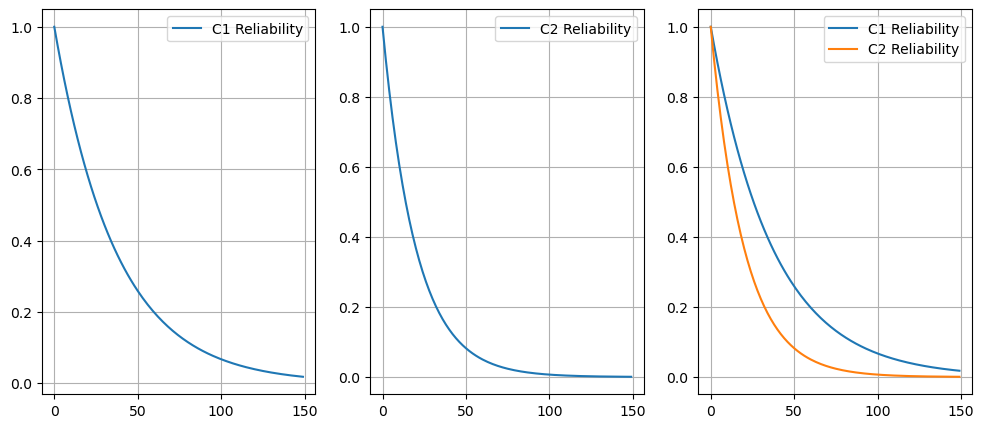

In [42]:
fig , ax = plt.subplots(1,3,figsize=(12,5) )
ax[0].plot(time,p1,label='C1 Reliability')
ax[0].grid()
ax[0].legend()


ax[1].plot(time,p2,label='C2 Reliability')
ax[1].grid()
ax[1].legend()


ax[2].plot(time,p1,label='C1 Reliability')
ax[2].plot(time,p2,label='C2 Reliability')
ax[2].grid()
ax[2].legend()

plt.show()

In [19]:
SystTime=np.arange(30)

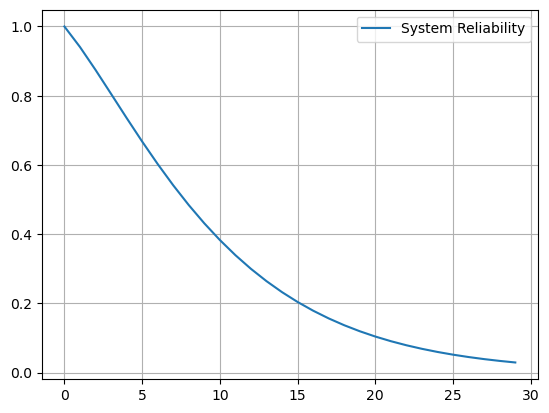

In [43]:
plt.plot(SystTime,(p1*(3*p2**2-2*p2**3)*p1)[:30],label='System Reliability')
plt.grid()
plt.legend()
plt.show()